In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import linear_model, datasets
from sklearn.linear_model import Lasso
%matplotlib inline

In [2]:
data = pd.read_csv('ExpressionR50.csv', header =None)
rows = pd.read_csv('RowsR50.csv')
age = np.array([12, 13, 13, 12, 16, 17, 21, 21, 24, 35, 37])
gene_id = rows.ix[:,2]
data_id = pd.concat([data, gene_id], axis=1)
new_data = data_id[data_id['gene-id']!= 0]
clean_data = new_data.ix[:,:-1]

In [3]:
just_data = new_data.ix[:,:11].values
just_dataT = just_data.T

In [4]:
genes_pca = PCA()
genes_pc = genes_pca.fit_transform(just_dataT)

In [5]:
print(genes_pca.explained_variance_ratio_)

[  5.52523295e-01   1.64026867e-01   8.90240697e-02   4.87904868e-02
   4.43305194e-02   3.44542972e-02   2.15485343e-02   1.81371253e-02
   1.58532208e-02   1.13115844e-02   2.64330765e-31]


In [6]:
result = -1
Cumsum = genes_pca.explained_variance_ratio_.cumsum()
for i in range(len(Cumsum)):
    if Cumsum[i]>=0.9:
        result = i
        break
print(result,"th PC")

5 th PC


In [7]:
genes_red = genes_pca.transform(just_dataT)

Lasso Regression: [ 0.48662638]
Lasso Intercept: 20.0909090909


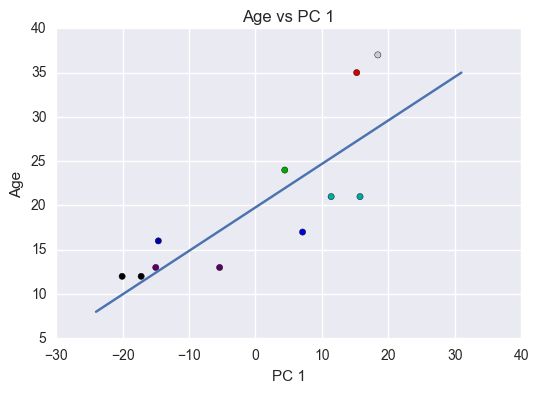

In [8]:
plt.scatter(genes_red[:,0].flatten(),age,
            c=age,cmap='nipy_spectral')

plt.xlabel('PC 1')
plt.ylabel('Age')
plt.title('Age vs PC 1')

clf = linear_model.Lasso(alpha=0.1)
clf.fit(genes_red[:,0].reshape(-1,1), age)

plt.plot([-24,31],[8,35])

print('Lasso Regression:', clf.coef_)
print('Lasso Intercept:', clf.intercept_)

(-22, 20)

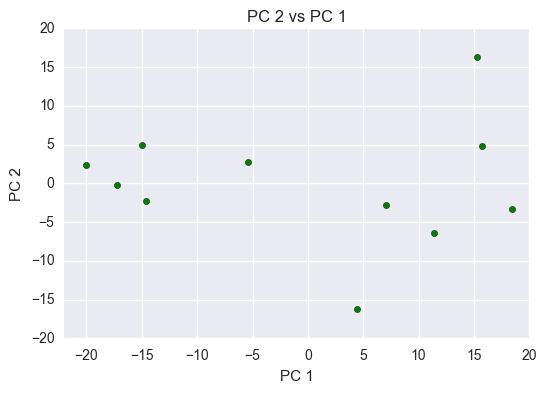

In [9]:
fig = plt.figure()
plt.scatter(genes_red[:,0].flatten(),genes_red[:,1].flatten(),c ='g')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PC 2 vs PC 1')
plt.xlim([-22,20])

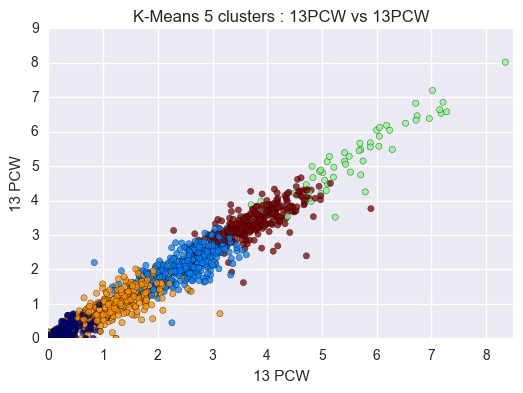

In [10]:
km = KMeans(n_clusters = 5)
km.fit(just_data)

group1 = km.labels_

plt.scatter(just_data[:,1],just_data[:,2],
            alpha=0.75, c=group1, cmap='jet')

plt.xlim([0,8.5])
plt.ylim([0,9])
plt.title('K-Means 5 clusters : 13PCW vs 13PCW')
plt.xlabel("13 PCW")
plt.ylabel("13 PCW")

In [11]:
pd.DataFrame(just_data[:,:]).head()
Predict = pd.DataFrame(group1)

Data_Predict = np.column_stack((new_data.iloc[:,11:13], Predict))
GeneID_Predict = pd.DataFrame(Data_Predict[:,:])
GeneID_Predict.head()

,0,1
0,30786,1
1,865,2
2,34129,1
3,81016,1
4,34829,1


In [12]:
cluster0 = GeneID_Predict[GeneID_Predict[1]== 0]
cluster1 = GeneID_Predict[GeneID_Predict[1]== 1]
cluster2 = GeneID_Predict[GeneID_Predict[1]== 2]
cluster3 = GeneID_Predict[GeneID_Predict[1]== 3]
cluster4 = GeneID_Predict[GeneID_Predict[1]== 4]

In [13]:
Cluster0_genes = cluster0.iloc[:,0:1].values
Cluster1_genes = cluster1.iloc[:,0:1].values
Cluster2_genes = cluster2.iloc[:,0:1].values
Cluster3_genes = cluster3.iloc[:,0:1].values
Cluster4_genes = cluster4.iloc[:,0:1].values

In [14]:
print('Cluster 0 size:', Cluster0_genes.size)
print('Cluster 1 size:', Cluster1_genes.size)
print('Cluster 2 size:', Cluster2_genes.size)
print('Cluster 3 size:', Cluster3_genes.size)
print('Cluster 4 size:', Cluster4_genes.size)

Cluster 0 size: 517
Cluster 1 size: 374
Cluster 2 size: 53
Cluster 3 size: 387
Cluster 4 size: 266
